# Revisando a árvore de decisão
- Falamos da árvore de decisão no módulo "Utilizando o Aprendizado de Máquinas" e no módulo de Scikit-Learn (O Scikit-Learn), além de usarmos em nossos projetos
- Vamos relembrar os principais conceitos e falar um pouco sobre seus hiperparâmetros
- **Para uma árvore de decisão**, sempre vamos usar as variáveis para responder perguntas de "SIM" ou "NÃO" e **dividir a nossa base em grupos** baseado nessas respostas, **sempre tentando que os grupos tenham apenas dados da mesma classe**
<img src="https://drive.google.com/uc?id=1E5T6eXhkFFz4YtpNU_iTiCzlFBEjos1C" style='width: 800px;' />

- Para o dataset iris, temos a seguinte árvore:
<img src="https://drive.google.com/uc?id=1pisZI-RmXgvkhqXJVnsklXGuHiHNmYeC" style='width: 800px;' />

- Existem **diferentes algoritmos** usados para criar a árvore de decisão, como o ID3, C4.5, C5.0 e CART.
    - https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
    - O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
        - Em resumo, a seleção dos nós é feita escolhendo qual recurso e limite irá **gerar um maior ganho de informação em cada nó**
            - Ganho de informação representa o quanto eu consigo reduzir a impureza dos dados, ou seja, o quanto eu consigo que o ramo ou folha seguinte ao nó seja o mais homogêneo possível
            - [Vamos falar disso um pouco mais pra frente](#escolha)
- Como podemos criar vários nós para a árvore, é um modelo que facilmente pode sofrer overfitting. **Quanto mais nós e folhas**, maior a complexidade da árvore e **menor sua capacidade de generalizar**

- **Novamente utilizando o dataset iris**

In [1]:
# Importando o dataset e o pandas
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Retornando os dados
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

In [4]:
# Visualizando a base
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- **Começando apenas com o target 1 e 2 e apenas as colunas de pétala**

In [5]:
# Selecionando apenas as colunas de pétala
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [6]:
# Separando X e y
X = iris1.drop('target',axis=1)
y = iris1.target

In [7]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

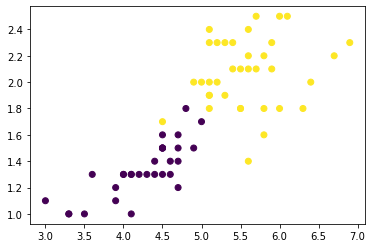

In [8]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],X_train['petal width (cm)'],c=y_train)

plt.show()

- **E então usar a árvore de decisão para classificar esses dados**

In [9]:
# Importando a árvore de decisão
from sklearn import tree

In [10]:
# Criando o classificador e fazendo o fit
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

In [11]:
# Verificando o score
clf.score(X_train,y_train)

1.0

- Podemos exibir essa árvore
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

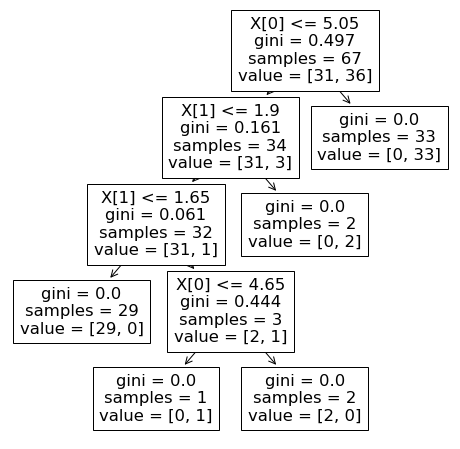

In [12]:
# Visualizando essa árvore
fig,ax = plt.subplots(figsize=(8,8))

tree.plot_tree(clf)

plt.show()

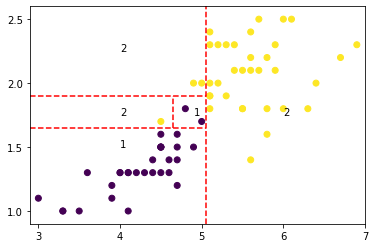

In [13]:
# Podemos adicionar essas regras no nosso gráfico)
fig,ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],X_train['petal width (cm)'],c=y_train)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.6), yticks=[1,1.5,2,2.5])

ax.plot([5.05,5.05],[0.9,2.6],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.annotate(2,(6,1.75))
ax.annotate(2,(4,2.25))
ax.annotate(2,(4,1.75))
ax.annotate(1,(4.9,1.75))
ax.annotate(1,(4,1.5))

plt.show()

In [14]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 6,  8]])

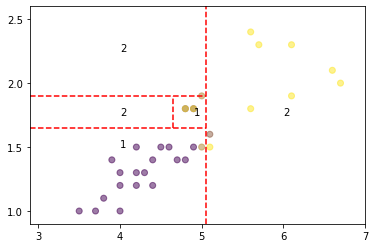

In [15]:
# Visualizando esses dados de teste no gráfico acima
fig,ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'],X_test['petal width (cm)'],c=y_pred,alpha=0.3)
ax.scatter(X_test['petal length (cm)'],X_test['petal width (cm)'],c=y_test,alpha=0.3)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.6), yticks=[1,1.5,2,2.5])

ax.plot([5.05,5.05],[0.9,2.6],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.annotate(2,(6,1.75))
ax.annotate(2,(4,2.25))
ax.annotate(2,(4,1.75))
ax.annotate(1,(4.9,1.75))
ax.annotate(1,(4,1.5))

plt.show()

- Por mais que ele esteja se ajustando bem aos dados de treino, ele não funciona tão bem para os dados de teste. Podemos dizer que nosso modelo não está conseguindo generalizar e podemos resolver isso ajustando os hiperparâmetros (que falaremos depois)

- Temos, em uma árvore de decisão:
<img src="https://drive.google.com/uc?id=1fVfGaYH7yq27wxIMRvy8mL5Il3bhxcO0" style='width: 400px;' />

- **Podemos considerar a base completa mas somente as 2 colunas de pétala**

In [16]:
# Selecionando apenas as colunas de pétala
iris1 = iris.loc[:,['petal length (cm)','petal width (cm)','target']]

# Separando X e y
X = iris1.drop('target',axis=1)
y = iris1.target

# Fazendo o train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [17]:
# Criando o classificador e fazendo o fit
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

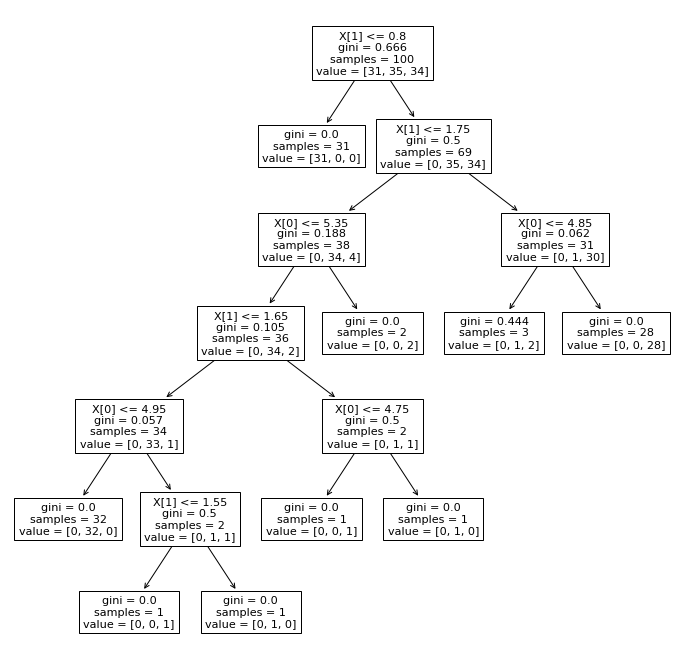

In [18]:
# Visualizando essa árvore
fig,ax = plt.subplots(figsize=(12,12))

tree.plot_tree(clf)

plt.show()

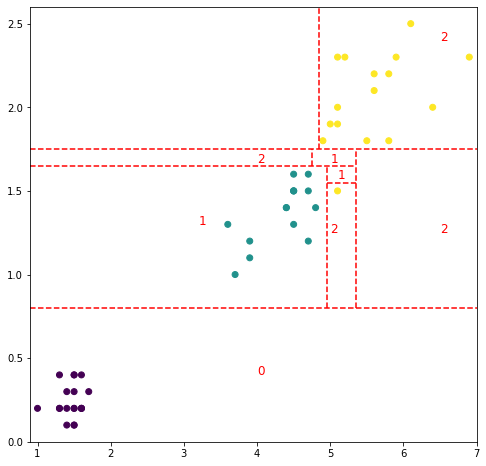

In [19]:
# Visualizando o gráfico de dispersão de width x length
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=X_test['petal length (cm)'],
           y=X_test['petal width (cm)'],
           c=y_test,
           cmap='viridis')


ax.plot([0.9,7],[0.8,0.8],'--r')
ax.plot([0.9,7],[1.75,1.75],'--r')
ax.plot([4.85,4.85],[1.75,2.6],'--r')
ax.plot([5.35,5.35],[0.8,1.75],'--r')
ax.plot([0.9,5.35],[1.65,1.65],'--r')
ax.plot([4.75,4.75],[1.65,1.75],'--r')
ax.plot([4.95,4.95],[0.8,1.65],'--r')
ax.plot([4.95,5.35],[1.55,1.55],'--r')

ax.annotate(0,(4,0.4),c='r',fontsize=12)
ax.annotate(2,(6.5,2.4),c='r',fontsize=12)
ax.annotate(2,(6.5,1.25),c='r',fontsize=12)
ax.annotate(1,(5,1.67),c='r',fontsize=12)
ax.annotate(2,(4,1.67),c='r',fontsize=12)
ax.annotate(1,(3.2,1.3),c='r',fontsize=12)
ax.annotate(1,(5.1,1.57),c='r',fontsize=12)
ax.annotate(2,(5,1.25),c='r',fontsize=12)

ax.set(xlim=(0.9, 7), xticks=[1,2,3,4,5,6,7],
       ylim=(0, 2.6), yticks=[0,0.5,1,1.5,2,2.5])

plt.show()

In [20]:
y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

- **Fazendo para toda a base**

In [21]:
# Separando X e y
X = iris.drop('target',axis=1)
y = iris.target

# Fazendo o train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
# Criando o classificador e fazendo o fit
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

# Verificando o score
clf.score(X_train,y_train)

1.0

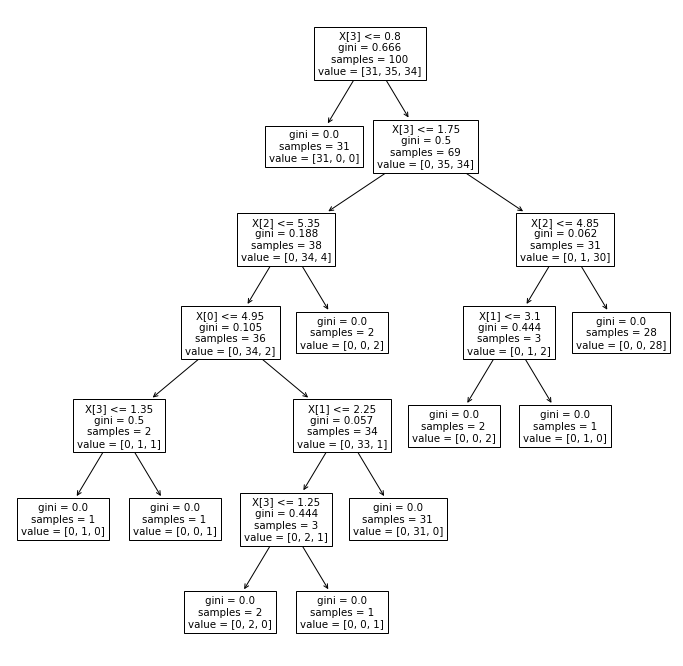

In [23]:
# Visualizando essa árvore
fig,ax = plt.subplots(figsize=(12,12))

tree.plot_tree(clf)

plt.show()

In [24]:
# Fazendo a previsão 
y_pred = clf.predict(X_test)

In [25]:
# Avaliando o modelo
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

<a id='escolha'></a>
### A escolha dos nós e limites <font color='blue'>(criterion)</font>
- Os métodos mais comuns para a escolha dos nós e dos limites são através do **índice gini e da entropia**
<img src="https://drive.google.com/uc?id=1_X3Z3aWtUSv20jtabaUCWTiS0UoV1ncv" style='width: 400px;' />
- Sendo p a proporção de cada classe nos dados

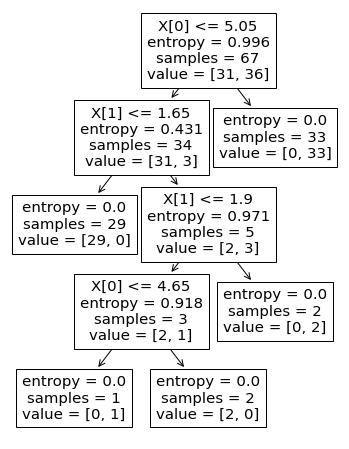

In [40]:
# Selecionando apenas as colunas de pétala
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

# Separando X e y
X = iris1.drop('target',axis=1)
y = iris1.target

# Fazendo o train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Criando o classificador 
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy').fit(X_train,y_train)

# Visualizando
fig,ax = plt.subplots(figsize=(6,8))

tree.plot_tree(clf)

plt.show()

- **Verificando o índice gini**

In [31]:
# Verificando o índice gini para o nó raiz
1-((31/67)**2+(36/67)**2)

0.49721541546001335

In [36]:
# Verificando para o primeiro nó da esquerda
no_esq = 1-((31/34)**2+(3/34)**2)

In [35]:
# e para o primeiro nó da direita
no_dir = 1-((0/33)**2+(33/33)**2)

In [37]:
# O índice gini dessa divisão pode ser dado calculando a média ponderada dos 2 nós
(34/67)*no_esq+(33/67)*no_dir

0.08165057067603168

- Nesse caso, vamos fazer para todos os nós possível e selecionar aquele que tiver o menor valor que calculamos como "gini" acima
- Um critério de parada geralmente usado é que se esse índice gini dos nós filhos não for maior que o índice do nó pai (do nó que gerou esses dois novos nós), podemos parar a divisão

In [41]:
# Para usar o log2, vamos importar o math
import math

In [43]:
# Verificando a entropia a raiz
-(31/67)*math.log2(31/67)-(36/67)*math.log2(36/67)

0.995978956518722

In [44]:
# Do nó esquerdo
-(31/34)*math.log2(31/34)-(3/34)*math.log2(3/34)

0.4305518670104394

In [45]:
# e do nó direito
-(33/33)*math.log2(33/33)-(0/33)*0

-0.0

### O tamanho da árvore <font color='blue'>(max_depth)</font>
- **Quanto mais nós tivermos na árvore, mais provavel é um overfitting e menos generalizável é o modelo**
- Para ajustar a "profundidade" máxima da árvore, podemos usar o hiperparâmetro **max_depth**

In [ ]:
# Importando o dataset

# Retornando os dados

# Transformando em um DataFrame

# Visualizando a base

In [ ]:
# Separando X e y

# Fazendo o train_test_split

# Criando o classificador

# Visualizando

In [ ]:
# Verificando o score

In [ ]:
# Fazendo a previsão

In [ ]:
# Verificando a acurácia

In [ ]:
# Criando um novo classificador "podando" a árvore

In [ ]:
# Verificando o score

In [ ]:
# Avaliando a acurácia